In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as signal
from os.path import join as pjoin

In [22]:
def dvb_channel_filter(data: np.array, draw=False):
    fpass = 5000000  # Pass band Frequency
    fstop = 10000000  # Stop band Frequency
    apass = 1  # Pass band Ripple (dB)
    astop = 100  # Stop band Attenuation (dB)
    fs = 30000000  # Sampling FrequencyV

    wp = fpass / (fs / 2)
    ws = fstop / (fs / 2)

    b, a = signal.iirdesign(wp, ws, apass, astop, ftype="ellip", output="ba")
    
    filtered_data = signal.lfilter(b, a, data)

    if draw:
        w, h = signal.freqz(b, a, worN=8000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h))
        plt.title('Filter Frequency Response')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Gain')
        plt.grid(True)
        plt.show()
    return filtered_data

In [15]:
dvbt_data = sio.loadmat(pjoin("data", "dvbt.mat"))

fc = dvbt_data["fc"][0][0]
f1 = dvbt_data["f1"][0][0]
f2 = dvbt_data["f2"][0][0]
fs = dvbt_data["fs"][0][0]
data = np.squeeze(dvbt_data["data"])


/home/jakub/.cache/pypoetry/virtualenvs/dvbt-py-h16fhYJi-py3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/jakub/.cache/pypoetry/virtualenvs/dvbt-py-h16fhYJi-py3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Fft of received data')

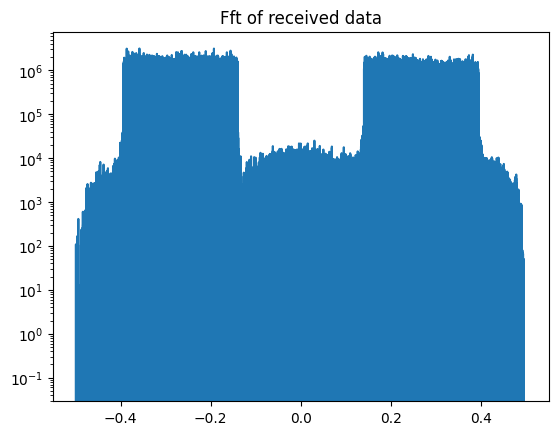

In [16]:
# For testing purposes limit number of processed data
data = data[0:100000]
N = len(data)
n = np.linspace(-0.5, 0.5, N)

# Plot fft of received data
plt.semilogy(n, np.fft.fftshift(np.fft.fft(data)))
plt.title("Fft of received data")


Text(0.5, 1.0, 'Lowered data fft')

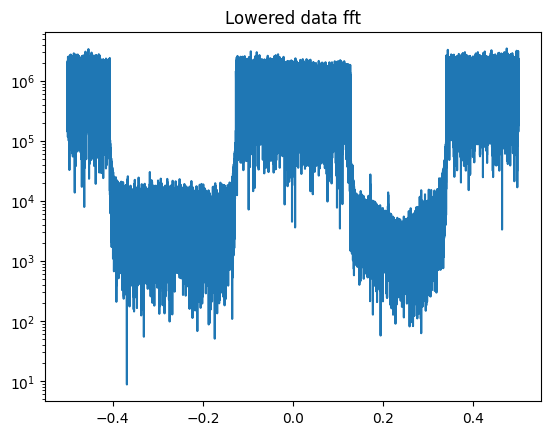

In [20]:
# Mix frequencies to lower frequency of examined signal

fo = 8e6 / fs
k = np.arange(0, len(data))
c = np.exp(-1j * (2 * np.pi * fo * k))
data_low =  np.multiply(data , c)

plt.figure()
plt.semilogy(n, np.abs(np.fft.fftshift(np.fft.fft(data_low))))
plt.title("Lowered data fft")

(-0.3, 0.3)

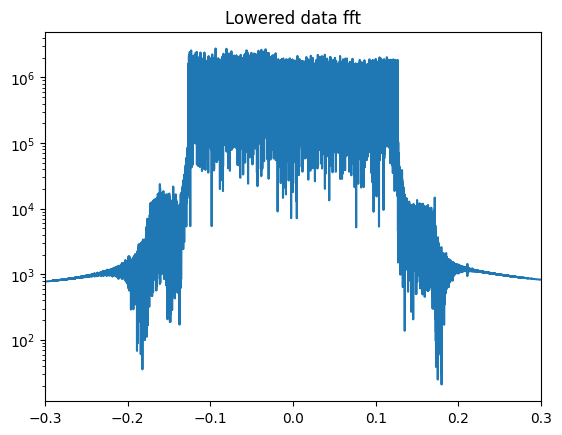

In [24]:
# Filter received data
data_filtered = dvb_channel_filter(data_low)
plt.figure()    
plt.semilogy(n, np.abs(np.fft.fftshift(np.fft.fft(data_filtered))))
plt.title("Lowered data fft")
plt.xlim([-0.3, 0.3])